# Projekt zaliczeniowy z Pythona pt. "Poliglota"

## Dany program potrafi zidentyfikować język na podstawie przedstawionego tekstu.

In [104]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import *
from IPython.display import display
from IPython.display import Image

Na początku wczytujemy dane wzorcowe, które zawierają średnie częstotliwości występowania poszczególnych liter w 15 wybranych językach (daną bazę można rozbudować po prostu dodając dane o kolejnych językach - program będzie działać tak samo). Po wczytaniu wyświetlamy nasz wzorcowy data frame przy pomocy pandasa.

In [105]:
df = pd.read_excel("dane_do_projektu.xlsx")
display(df)

,Letter,English,French,German,Spanish,Portuguese,Esperanto,Italian,Turkish,Swedish,Polish,Dutch,Danish,Icelandic,Finnish,Czech
0,a,0.08167,0.07636,0.06516,0.11525,0.14634,0.12117,0.11745,0.12920,0.09383,0.10503,0.07486,0.06025,0.10110,0.12217,0.08421
1,b,0.01492,0.00901,0.01886,0.02215,0.01043,0.00980,0.00927,0.02844,0.01535,0.01740,0.01584,0.02000,0.01043,0.00281,0.00822
2,c,0.02782,0.03260,0.02732,0.04019,0.03882,0.00776,0.04501,0.01463,0.01486,0.03895,0.01242,0.00565,0.00000,0.00281,0.00740
3,d,0.04253,0.03669,0.05076,0.05010,0.04992,0.03044,0.03736,0.05206,0.04702,0.03725,0.05933,0.05858,0.01575,0.01043,0.03475
4,e,0.12702,0.14715,0.16396,0.12181,0.12570,0.08995,0.11792,0.09912,0.10149,0.07352,0.18910,0.15453,0.06418,0.07968,0.07562
5,f,0.02228,0.01066,0.01656,0.00692,0.01023,0.01037,0.01153,0.00461,0.02027,0.00143,0.00805,0.02406,0.03013,0.00194,0.00084
6,g,0.02015,0.00866,0.03009,0.01768,0.01303,0.01171,0.01644,0.01253,0.02862,0.01731,0.03403,0.04077,0.04241,0.00392,0.00092
7,h,0.06094,0.00737,0.04577,0.00703,0.00781,0.00384,0.00636,0.01212,0.02090,0.01015,0.02380,0.01621,0.01871,0.01851,0.01356
8,i,0.06966,0.07529,0.06550,0.06247,0.06186,0.10012,0.10143,0.09600,0.05817,0.08328,0.06499,0.06000,0.07578,0.10817,0.06073
9,j,0.00153,0.00613,0.00268,0.00493,0.00397,0.03501,0.00011,0.00034,0.00614,0.01836,0.01460,0.00730,0.01144,0.02042,0.01433


Następnie tworzymy słownik z naszego wzorcowego data frame'u.

In [106]:
stats = df.to_dict()
display(stats)

{'Czech': {0: 0.084209999999999993,
  1: 0.0082199999999999999,
  2: 0.0074000000000000003,
  3: 0.034750000000000003,
  4: 0.075620000000000007,
  5: 0.00084000000000000003,
  6: 0.00092000000000000003,
  7: 0.013559999999999999,
  8: 0.060729999999999999,
  9: 0.014330000000000001,
  10: 0.02894,
  11: 0.038019999999999998,
  12: 0.024459999999999999,
  13: 0.064680000000000001,
  14: 0.066949999999999996,
  15: 0.019060000000000001,
  16: 1.0000000000000001e-05,
  17: 0.047989999999999998,
  18: 0.05212,
  19: 0.057270000000000001,
  20: 0.021600000000000001,
  21: 0.053440000000000001,
  22: 0.00016000000000000001,
  23: 0.00027,
  24: 0.01043,
  25: 0.01503,
  26: 0.0,
  27: 0.0,
  28: 0.0086700000000000006,
  29: 0.0,
  30: 0.0,
  31: 0.0,
  32: 0.0,
  33: 0.0,
  34: 0.0,
  35: 0.0,
  36: 0.0063299999999999997,
  37: 0.0,
  38: 0.0,
  39: 0.0,
  40: 0.01643,
  41: 0.0,
  42: 0.0,
  43: 0.0,
  44: 0.0,
  45: 0.0,
  46: 0.00024000000000000001,
  47: 0.0,
  48: 0.0,
  49: 0.0,
  50:

Widzimy, że otrzymaliśmy słownik słowników, lecz nie mamy poszczególnych liter jako kluczy wewnętrznych słowników tylko ich indeksy. Poniższy kod zamienia liczby-klucze na literki, co jest niezbędne do dalszej analizy.


In [107]:
mappings = stats["Letter"]

stats_new = {}
for k, v in stats.items():
    if k != "Letter":
        newdict = {}

        for kk, vv in v.items():
            newdict[mappings[kk]] = vv

        stats_new[k] = newdict
        
stats_new

{'Czech': {'a': 0.084209999999999993,
  'b': 0.0082199999999999999,
  'c': 0.0074000000000000003,
  'd': 0.034750000000000003,
  'e': 0.075620000000000007,
  'f': 0.00084000000000000003,
  'g': 0.00092000000000000003,
  'h': 0.013559999999999999,
  'i': 0.060729999999999999,
  'j': 0.014330000000000001,
  'k': 0.02894,
  'l': 0.038019999999999998,
  'm': 0.024459999999999999,
  'n': 0.064680000000000001,
  'o': 0.066949999999999996,
  'p': 0.019060000000000001,
  'q': 1.0000000000000001e-05,
  'r': 0.047989999999999998,
  's': 0.05212,
  't': 0.057270000000000001,
  'u': 0.021600000000000001,
  'v': 0.053440000000000001,
  'w': 0.00016000000000000001,
  'x': 0.00027,
  'y': 0.01043,
  'z': 0.01503,
  'ß': 0.0,
  'à': 0.0,
  'á': 0.0086700000000000006,
  'â': 0.0,
  'ã': 0.0,
  'ä': 0.0,
  'å': 0.0,
  'æ': 0.0,
  'ç': 0.0,
  'è': 0.0,
  'é': 0.0063299999999999997,
  'ê': 0.0,
  'ë': 0.0,
  'ì': 0.0,
  'í': 0.01643,
  'î': 0.0,
  'ï': 0.0,
  'ð': 0.0,
  'ñ': 0.0,
  'ò': 0.0,
  'ó': 0.000

Żeby najpierw podliczyć ilość kolejnych liter dla danego języka, wczytujemy jeszcze raz plik wzorcowy i zamieniamy go na słownik oraz przypisujemy do każdej literki wartość zero, ponieważ póżniej wczytamy plik tekstowy, z którego będą pobierane i liczone litery.

In [108]:
xls = ExcelFile('dane_do_projektu.xlsx').parse('Arkusz1')

#x.append(xls['Letter'])
my_dict = {}
for letter in xls['Letter']:
    my_dict[letter] = 0
print(my_dict)


{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0, 'ß': 0, 'à': 0, 'á': 0, 'â': 0, 'ã': 0, 'ä': 0, 'å': 0, 'æ': 0, 'ç': 0, 'è': 0, 'é': 0, 'ê': 0, 'ë': 0, 'ì': 0, 'í': 0, 'î': 0, 'ï': 0, 'ð': 0, 'ñ': 0, 'ò': 0, 'ó': 0, 'ô': 0, 'õ': 0, 'ö': 0, 'ø': 0, 'ù': 0, 'ú': 0, 'û': 0, 'ü': 0, 'ý': 0, 'þ': 0, 'ą': 0, 'ć': 0, 'ĉ': 0, 'č': 0, 'ď': 0, 'ę': 0, 'ě': 0, 'ĝ': 0, 'ğ': 0, 'ĥ': 0, 'ı': 0, 'ĵ': 0, 'ł': 0, 'ń': 0, 'ň': 0, 'œ': 0, 'ř': 0, 'ś': 0, 'ŝ': 0, 'ş': 0, 'š': 0, 'ť': 0, 'ŭ': 0, 'ů': 0, 'ź': 0, 'ż': 0, 'ž': 0}


Wczytujemy plik z tekstem, liczymy ilość poszczególnych literek, która się zapisuje do wartości w poprzednio stworzonym słowniku.

In [109]:
#text = input(print("Wpisz nazwę pliku tekstowego, który chcesz zbadać: \n "))


In [110]:
fd = open("text_Finnish.txt",'r')
number_of_letters = 0
for line in fd:
    for c in line:
        if c.isalpha():
            my_dict[c.lower()] += 1
            number_of_letters += 1
print(my_dict, number_of_letters)  

for letter in xls['Letter']:
    my_dict[letter] = my_dict[letter] / number_of_letters
#print(my_dict)

{'a': 5118, 'b': 80, 'c': 16, 'd': 388, 'e': 3891, 'f': 119, 'g': 106, 'h': 521, 'i': 5145, 'j': 947, 'k': 2232, 'l': 2230, 'm': 1487, 'n': 3691, 'o': 2496, 'p': 782, 'q': 2, 'r': 1172, 's': 3849, 't': 3799, 'u': 2139, 'v': 1016, 'w': 9, 'x': 18, 'y': 701, 'z': 3, 'ß': 0, 'à': 0, 'á': 0, 'â': 0, 'ã': 0, 'ä': 1573, 'å': 0, 'æ': 0, 'ç': 0, 'è': 0, 'é': 0, 'ê': 0, 'ë': 0, 'ì': 0, 'í': 0, 'î': 0, 'ï': 0, 'ð': 0, 'ñ': 0, 'ò': 0, 'ó': 0, 'ô': 0, 'õ': 0, 'ö': 153, 'ø': 0, 'ù': 0, 'ú': 0, 'û': 0, 'ü': 0, 'ý': 0, 'þ': 0, 'ą': 0, 'ć': 0, 'ĉ': 0, 'č': 0, 'ď': 0, 'ę': 0, 'ě': 0, 'ĝ': 0, 'ğ': 0, 'ĥ': 0, 'ı': 0, 'ĵ': 0, 'ł': 0, 'ń': 0, 'ň': 0, 'œ': 0, 'ř': 0, 'ś': 0, 'ŝ': 0, 'ş': 0, 'š': 4, 'ť': 0, 'ŭ': 0, 'ů': 0, 'ź': 0, 'ż': 0, 'ž': 2} 43689


Tworzymy funkcję która liczy odległość statystyczną w L^2 i wypisujemy ją.


In [111]:
def stat_dist(distr1: dict, distr2: dict) -> float:
    "calculates the l_2 distance between two distributions"
    tmp = 0.0
    for i in distr1.keys():
        x = (distr1[i] - distr2[i])
        tmp += x * x
    return tmp
    
stat_dist(stats_new["English"], my_dict)  # magic from stackoverflow

0.01751702614822043

Tworzymy słownik do wypisania odległości dla wszystkich języków oraz wybieramy ten, którego odległość jest najmniejsza, czyli potencjalnego kandydata.

In [112]:
dists = {}
for lang, distr in stats_new.items():
    dists[lang] = stat_dist(distr, my_dict)

candidate = sorted(dists, key=dists.get)[0]
if dists[candidate] > 0.02:
    print("Nie można poprawnie zidentyfikować języka. Najbliższym z dostępnych jest:")
print(candidate)
print("distance =", dists[candidate])
dists

Finnish 
distance = 0.000426214404072


{'Czech': 0.013200607911913811,
 'Danish': 0.024121299711520119,
 'Dutch': 0.027326835821506617,
 'English': 0.01751702614822043,
 'Esperanto ': 0.0075493082713063344,
 'Finnish ': 0.0004262144040720181,
 'French': 0.016016316479862264,
 'German ': 0.024046445922120043,
 'Icelandic ': 0.017307314158856977,
 'Italian': 0.015609984092160554,
 'Polish': 0.021586226124379191,
 'Portuguese ': 0.021576007630128919,
 'Spanish ': 0.0178536358040766,
 'Swedish ': 0.013420879014507139,
 'Turkish ': 0.019652342368326178}

Rysujemy wykres częstotliwości występowania liter w odnalezionym przez nas języku oraz wskazujemy najczęściej i najrzadziej występowaną literę.

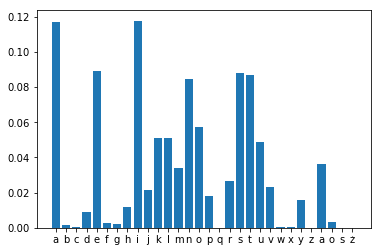

Najczęściej spotykaną literą w wybranym języku jest:  i , o częstotliwości:  0.11776419693744421
Najrzadziej spotykaną literą w wybranym języku jest:  q , o częstotliwości:  4.5778113483943327e-05


In [113]:
#display(my_dict)
help_dict = {x:y for x,y in my_dict.items() if y!=0}

plt.bar(range(len(help_dict)), list(help_dict.values()), width = 0.8,  align='center')
plt.xticks(range(len(help_dict)), list(help_dict.keys()))

plt.show()
maks = sorted(help_dict, key=help_dict.get)[len(help_dict) - 1]
print("Najczęściej spotykaną literą w wybranym języku jest: ", maks, ", o częstotliwości: ", help_dict[maks])
min = sorted(help_dict, key=help_dict.get)[0]
print("Najrzadziej spotykaną literą w wybranym języku jest: ", min, ", o częstotliwości: ", help_dict[min])

Na koniec załączamy obrazek, który dumnie reprezentuje kraj ojczysty naszego języka :)

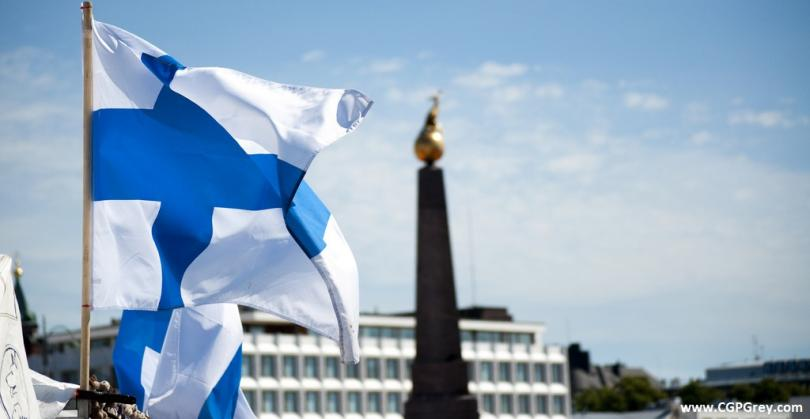

In [116]:
img = Image(candidate.strip() +'.jpg')
img

# Koniec :)